In [10]:
import requests
from PIL import Image
from io import BytesIO

import torch
import torchvision.models as models
import  torchvision.transforms as transforms

device = torch.device("mps")

In [6]:
IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS = 224,224,3

model = models.resnet50(weights='ResNet50_Weights.IMAGENET1K_V1').to(device)

In [7]:
# preprocessing of images pipeline
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(IMAGE_WIDTH),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [9]:
# imagenet class names
img_class_names = "https://storage.googleapis.com/download.tensorflow.org/data/imagenet_class_index.json"
clss_idx = requests.get(img_class_names).json()
idx_clss = {int(k): v[-1] for k, v in clss_idx.items()}

In [15]:
def classify_imgs(url):
    model.eval()
    resp = requests.get(url)
    img = Image.open(BytesIO(resp.content))
    img = img.resize((IMAGE_WIDTH, IMAGE_HEIGHT), Image.Resampling.LANCZOS)
    display(img)

    # preprocess
    img_tnsr = preprocess(img).unsqueeze(0).to(device)

    # model pred
    with torch.no_grad():
        op = model(img_tnsr)
        prob = torch.nn.functional.softmax(op, dim=1)[0] * 100
        top7_prob, top7_idx = prob.topk(7)

    print('Top 7 predictions: ')
    for i in range(7):
        print(f"{i+1}, {idx_clss[top7_idx[i].item()]}: {top7_prob[i].item():.2f}%")

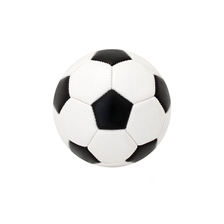

Top 7 predictions: 
1, soccer_ball: 89.90%
2, honeycomb: 7.14%
3, whistle: 0.61%
4, digital_clock: 0.27%
5, golf_ball: 0.20%
6, custard_apple: 0.10%
7, volleyball: 0.08%


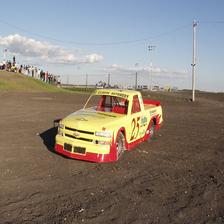

Top 7 predictions: 
1, racer: 80.54%
2, sports_car: 6.28%
3, pickup: 4.36%
4, tow_truck: 2.68%
5, car_wheel: 1.95%
6, ambulance: 0.98%
7, convertible: 0.75%


In [16]:
ROOT = "https://data.heatonresearch.com/data/t81-558/images/"

classify_imgs(ROOT+"soccer_ball.jpg")
classify_imgs(ROOT+"race_truck.jpg")